In [1]:
import tweepy
from tweepy import *
import pandas as pd
import time
import re
import numpy as np
import warnings
import networkx as nx
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [35]:
bearer_token="AAAAAAAAAAAAAAAAAAAAAPablQEAAAAAaM6udljXUe3ypzhh%2Brx%2BUB2%2B9MA%3DNn9wQgX4yOKBDf9Hpf6FAbCRBmbhVDfU8MARl5mCYxhsHAA30m"
consumer_key = "ZmVEhabWyVWyW2AKnaMDRcPx8"
consumer_secret = "BwxLn0TL4ZOuwThoPtuT5ycT5Rwi52xr3cG1uUMHSzoRWklAD2"
access_token = "826471220514324484-E6sag0oLoI8uowbZdITlFTjLb4h4Xv0"
access_token_secret = "kf6hgQbG1qX2HHtKxN3CQ1UtzjUiBwT81QnoF21WxdTM3"

authorization = tweepy.OAuth2AppHandler(consumer_key, consumer_secret)
api = tweepy.API(authorization,wait_on_rate_limit=True)

In [36]:
actor_list_df=pd.read_csv('actor_list.csv')
actor_list=actor_list_df['twitter_handle'].to_list()
columns = ['TweetId', 'User', 'Tweet','Type']
data = []
i=0
for actor in actor_list:
  print("Scraping tweets of",actor)
  tweets = api.user_timeline(screen_name=actor, count=2000,tweet_mode='extended')
  for tweet in tweets:
      data.append([tweet.id, tweet.user.screen_name, tweet.full_text,actor_list_df['type'][i]])
  i=i+1

Scraping tweets of PlabitaB
Scraping tweets of TheVivaanShah
Scraping tweets of ManorRama
Scraping tweets of KaranRajKohli
Scraping tweets of sudnigga
Scraping tweets of ImsorruSingh
Scraping tweets of aditiraohydari
Scraping tweets of ShatafFigar
Scraping tweets of MsPunvanity
Scraping tweets of kamaljeetnegi
Scraping tweets of ankupande
Scraping tweets of sidharth_shukla
Scraping tweets of ikamalhaasan
Scraping tweets of UdayPratapSingh
Scraping tweets of MoharBasu
Scraping tweets of Anilcharanjeett
Scraping tweets of SidMa
Scraping tweets of The_PrettyBloom
Scraping tweets of Sukanya76030718
Scraping tweets of Sidians_World
Scraping tweets of parthasaha1990
Scraping tweets of TheVivekSharma
Scraping tweets of TheAaryanSingh_
Scraping tweets of harrygandhi
Scraping tweets of vishalrr
Scraping tweets of deepikapadukone
Scraping tweets of vivekoberoi
Scraping tweets of SalmanKhan
Scraping tweets of RajkummarRao
Scraping tweets of sohail_sen
Scraping tweets of harryjoshactor
Scraping tw

Scraping tweets of DipikaPallikal
Scraping tweets of Priyanka_Goswam
Scraping tweets of BoxerJaismine
Scraping tweets of Phogat_Vinesh
Scraping tweets of rohit_tokas
Scraping tweets of HussamBoxer1
Scraping tweets of BhavinaOfficial
Scraping tweets of NituGhanghas333
Scraping tweets of ravidahiya60
Scraping tweets of saroshlodhi
Scraping tweets of BajrangPunia
Scraping tweets of SakshiMalik
Scraping tweets of deepakpunia86
Scraping tweets of OLyAnshu
Scraping tweets of DivyaWrestler
Scraping tweets of sancheti_ajay
Scraping tweets of mirabai_chanu
Scraping tweets of raltejeremy
Scraping tweets of HarshKapoor_
Scraping tweets of PandeyJaideep
Scraping tweets of KritiKharbanda6
Scraping tweets of Su4ita
Scraping tweets of vrindaprasad
Scraping tweets of crhemanth
Scraping tweets of TheNameIsYash
Scraping tweets of KoulagiShantu
Scraping tweets of PavanWadeyar
Scraping tweets of volkswagenindia
Scraping tweets of arjun_kanungo
Scraping tweets of JagranEnglish
Scraping tweets of IamSumitSu

In [37]:

#code for df_for_graph
df_for_graph = pd.DataFrame(data, columns=columns)

#fetch mentioned user
df_for_graph['Mentioned_user'] = df_for_graph.apply(lambda row : ", ".join(re.findall(r'@\w+',row['Tweet'])), axis = 1)
df_for_graph['Mentioned_user'] = df_for_graph.Mentioned_user.str.split(', ')
df_for_graph['User'] = '@' + df_for_graph['User'].astype(str)
#unpivot the mentioned users
df_for_graph = df_for_graph.explode('Mentioned_user', ignore_index=True).dropna()

df_for_graph =df_for_graph[df_for_graph['Mentioned_user']!=""]
df_for_graph


,TweetId,User,Tweet,Type,Mentioned_user
0,1556606461416853504,@PlabitaB,Love the concept of not having to waste time t...,O,@ottplayapp
1,1492334528613867524,@PlabitaB,Miliye Chandel parivaar ke bete Raman se. Ghar...,O,@ZEE5India
2,1491612019807506432,@PlabitaB,"Miliye Rajan Chandel se, yeh apne zimmedariyan...",O,@ZEE5
3,1491413483640205312,@PlabitaB,"Miliye Supriya ji se, jinki khushiyon pe lag g...",O,@ZEE5
4,1491070943791575041,@PlabitaB,"Kya Lockdown ke sath, Supriya ji ka intezaar b...",O,@ZEE5India
...,...,...,...,...,...
140541,1508264967530815490,@alifazal9,RT @TheAcademy: Aneil Karia and Riz Ahmed win ...,O,@TheAcademy
140542,1508264967530815490,@alifazal9,RT @TheAcademy: Aneil Karia and Riz Ahmed win ...,O,@r
140543,1508240289387151360,@alifazal9,My last day and hell am gonna try #Sona right ...,O,@priyankachopra
140544,1508121987054735363,@alifazal9,RT @DOTNMovie: Seduction. Greed. Murder. #Deat...,O,@DOTNMovie


In [39]:

plt.figure(figsize=(25,25))
G = nx.from_pandas_edgelist(df_for_graph,source='User',target='Mentioned_user')


<Figure size 1800x1800 with 0 Axes>

In [41]:
#flower graph, takes time

pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))
# nx.draw(G, with_labels=True,label_size=, node_size=10, node_color='#00b4d9')
d = dict(G.degree)
labels = {
    n: (n
        if len([x for x in nx.all_neighbors(G, n)]) > 5
        else '')
    for n in G.nodes
}
# nx.draw(G, with_labels=True, labels=labels)
nx.draw_networkx_nodes(G, pos, nodelist=d, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=labels)
nx.draw_networkx_edges(G, pos, edge_color='tab:gray')
# nx.draw(G, pos, with_labels=True, labels=labels, edge_color='tab:gray')
plt.figure()


KeyboardInterrupt: 

In [44]:
#data cleaning
#we just want to see interaction among the actors in the list
data_req = []
for ind in df_for_graph.index:
    if df_for_graph['Mentioned_user'][ind].replace('@','') in actor_list:
        data_req.append([df_for_graph['User'][ind],df_for_graph['Mentioned_user'][ind],df_for_graph['Type'][ind]])
        
columns_req = ['User', 'Mentioned_user','type']
df_for_graph_v2 = pd.DataFrame(data_req, columns=columns_req)
df_for_graph_v2=df_for_graph_v2[df_for_graph_v2['User']!=df_for_graph_v2['Mentioned_user']]

In [2]:
# df_for_graph_v2.to_csv("for_gephi.csv")
df_for_graph_v2 = pd.read_csv(r'G:\My Drive\Mccombs MSBA\Courses\Social Media Analytics\Group Project\for_network.csv')

In [4]:
df_for_graph_v2_O=df_for_graph_v2[df_for_graph_v2["type"]=="O"]
df_for_graph_v2_N=df_for_graph_v2[df_for_graph_v2["type"]=="N"]
df_for_graph_v2_S=df_for_graph_v2[df_for_graph_v2["type"]=="S"]
df_for_graph_v2_P=df_for_graph_v2[df_for_graph_v2["type"]=="P"]

<Figure size 2500x2500 with 0 Axes>

<Figure size 432x288 with 0 Axes>

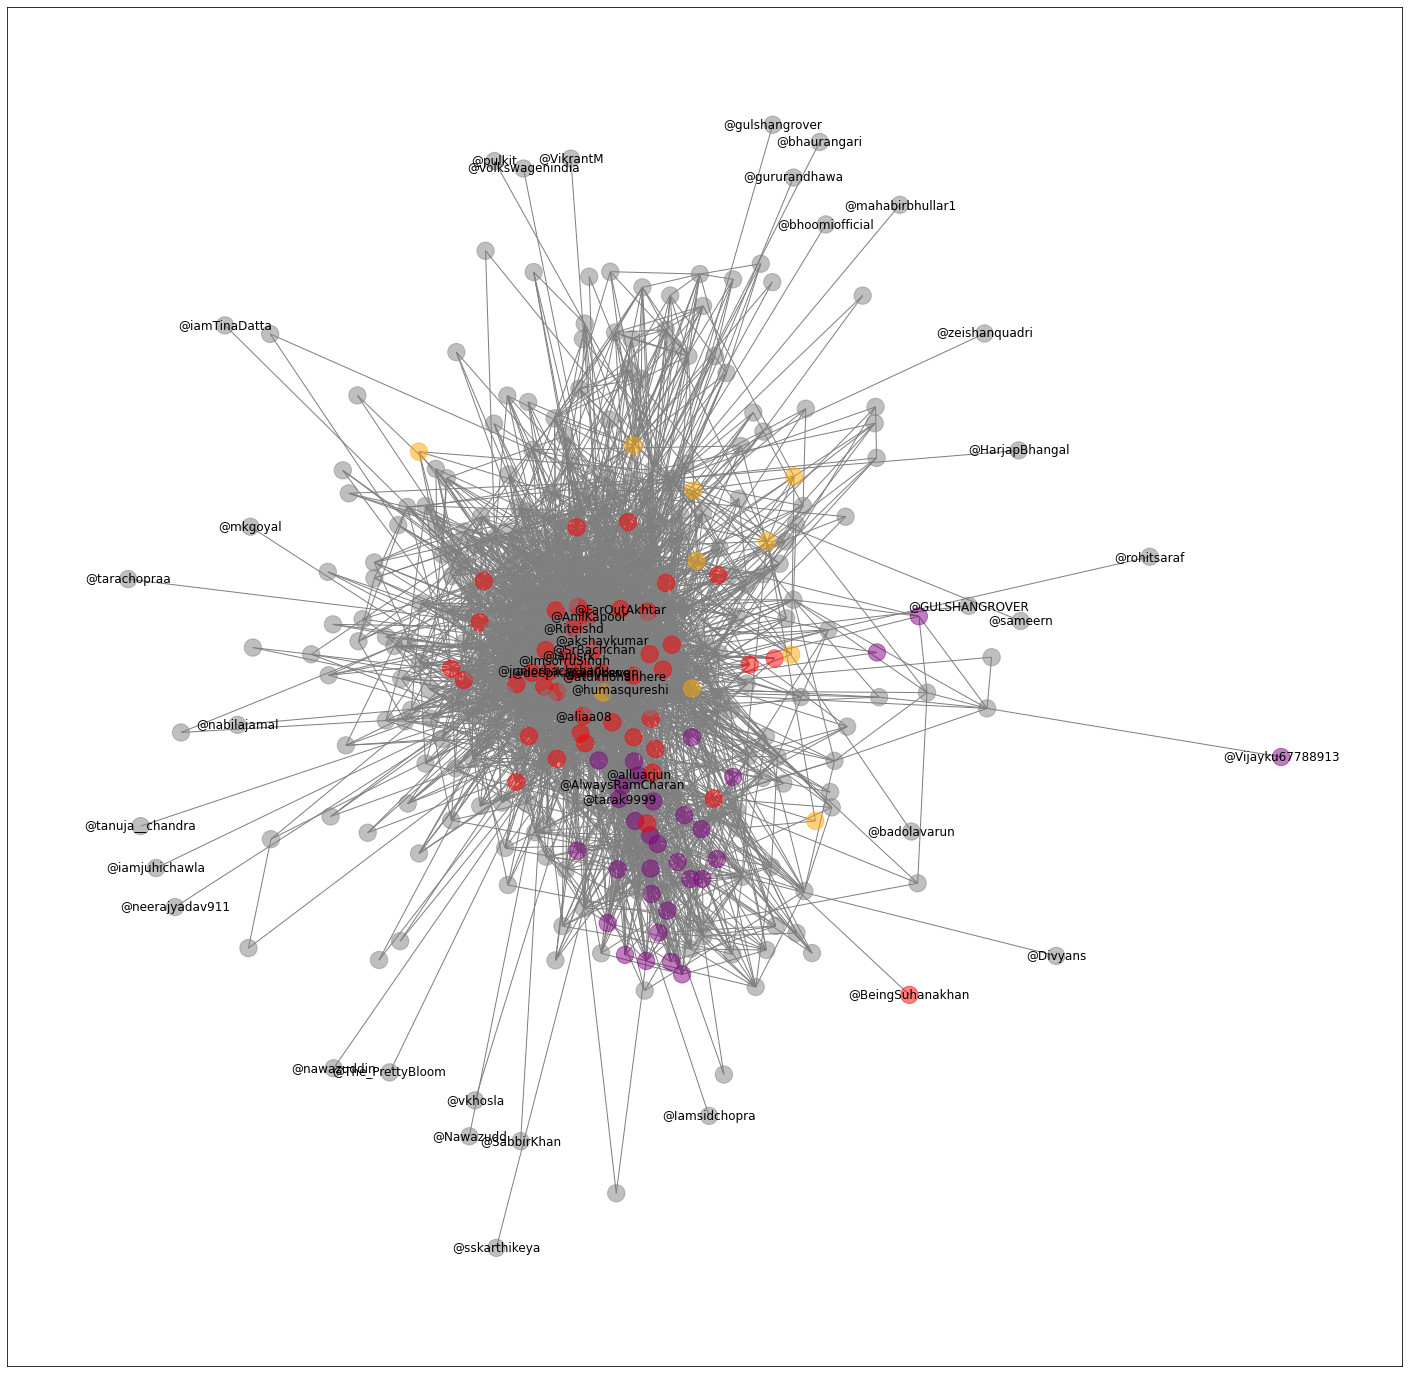

<Figure size 432x288 with 0 Axes>

In [47]:

plt.figure(figsize=(25,25))
G2 = nx.from_pandas_edgelist(df_for_graph_v2,source='User',target='Mentioned_user')
pos2 = nx.spring_layout(G2, scale=20, k=3/np.sqrt(G2.order()))
# nx.draw(G, with_labels=True,label_size=, node_size=10, node_color='#00b4d9')
d2 = dict(G2.degree)
labels = {
    n: (n
        if len([x for x in nx.all_neighbors(G2, n)]) >50 or len([x for x in nx.all_neighbors(G2, n)]) == 1
        else '')
    for n in G2.nodes
}
colors = []
for node in G2:
    if node in df_for_graph_v2_O["User"].values:
        colors.append("grey")
    elif node in df_for_graph_v2_N["User"].values:
        colors.append("red")
    elif node in df_for_graph_v2_S["User"].values:
        colors.append("purple")
    elif node in df_for_graph_v2_P["User"].values:
        colors.append("orange")
    else: colors.append("grey")
        
# nx.draw(G, with_labels=True, labels=labels)
nx.draw_networkx_nodes(G2, pos2,node_color=colors, nodelist=d2, alpha=0.5)
nx.draw_networkx_labels(G2, pos2, labels=labels)
nx.draw_networkx_edges(G2, pos2, edge_color='tab:gray')
# nx.draw(G, pos, with_labels=True, labels=labels, edge_color='tab:gray')
plt.figure()

In [5]:
degree = nx.degree_centrality(G2)
betweenness = nx.betweenness_centrality(G2)
closeness = nx.closeness_centrality(G2)
eigenvector_centrality = nx.eigenvector_centrality(G2)

centrality_df = pd.DataFrame(degree,index=['degree']).T
centrality_df['betweenness'] = pd.DataFrame(betweenness,index=['betweenness']).T.betweenness
centrality_df['closeness'] = pd.DataFrame(closeness,index=['closeness']).T.closeness
centrality_df['eigenvector_centrality'] = pd.DataFrame(eigenvector_centrality,index=['eigenvector_centrality']).T.eigenvector_centrality

centrality_df = centrality_df.reset_index().rename(columns={'index':'name'})
centrality_df

,name,degree,betweenness,closeness,eigenvector_centrality
0,@PlabitaB,0.041162,0.002047,0.415493,0.032997
1,@TheVivaanShah,0.019370,0.000155,0.379945,0.015761
2,@ShivPanditt,0.077482,0.013928,0.444564,0.052052
3,@ManorRama,0.033898,0.000851,0.414243,0.033414
4,@KaranRajKohli,0.024213,0.000500,0.392959,0.021304
...,...,...,...,...,...
409,@Divyans,0.002421,0.000000,0.284828,0.001144
410,@sskarthikeya,0.002421,0.000000,0.302343,0.001628
411,@sargun_mehta,0.012107,0.000079,0.373080,0.013640
412,@rajeevactor,0.041162,0.003188,0.425773,0.039435


In [12]:
# centrality_df.sort_values('eigenvector_centrality',ascending=False)[centrality_df['name']=='@BeingSuhanakhan']
centrality_df.sort_values('eigenvector_centrality',ascending=False)[:20]


,name,degree,betweenness,closeness,eigenvector_centrality
19,@SrBachchan,0.234867,0.066044,0.541995,0.187334
29,@iamsrk,0.242131,0.076194,0.537760,0.172504
27,@akshaykumar,0.198547,0.039552,0.517544,0.166742
36,@ajaydevgn,0.152542,0.020810,0.504890,0.156644
12,@ImsorruSingh,0.184019,0.036987,0.524112,0.155606
15,@AnilKapoor,0.157385,0.020895,0.492840,0.151711
127,@AlwaysRamCharan,0.167070,0.029983,0.507995,0.150053
181,@atulmohanhere,0.140436,0.016630,0.496394,0.144212
25,@Riteishd,0.159806,0.029837,0.501823,0.136238
28,@deepikapadukone,0.147700,0.014139,0.486455,0.136219
